['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[0.]
 [1.]
 [1.]
 [0.]
 [2.]
 [1.]
 [2.]
 [0.]
 [0.]
 [2.]
 [1.]
 [0.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [2.]
 [1.]
 [0.]
 [0.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [0.]
 [1.]
 [0.]
 [1.]
 [2.]
 [2.]
 [0.]
 [2.]
 [2.]
 [1.]]


/home/tpe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/tpe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(2500,)
[1. 1. 1. ... 1. 1. 1.]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[0.]
 [1.]
 [1.]
 [0.]
 [2.]
 [1.]
 [2.]
 [0.]
 [0.]
 [2.]
 [1.]
 [0.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [2.]
 [1.]
 [0.]
 [0.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [0.]
 [1.]
 [0.]
 [1.]
 [2.]
 [2.]
 [0.]
 [2.]
 [2.]
 [1.]]
[0. 1. 1. 0. 2. 1. 2. 0. 0. 2. 1. 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 2. 1. 0. 0. 1. 2. 1. 2. 1. 2. 2. 0. 1. 0. 1. 2. 2. 0. 2. 2. 1.]


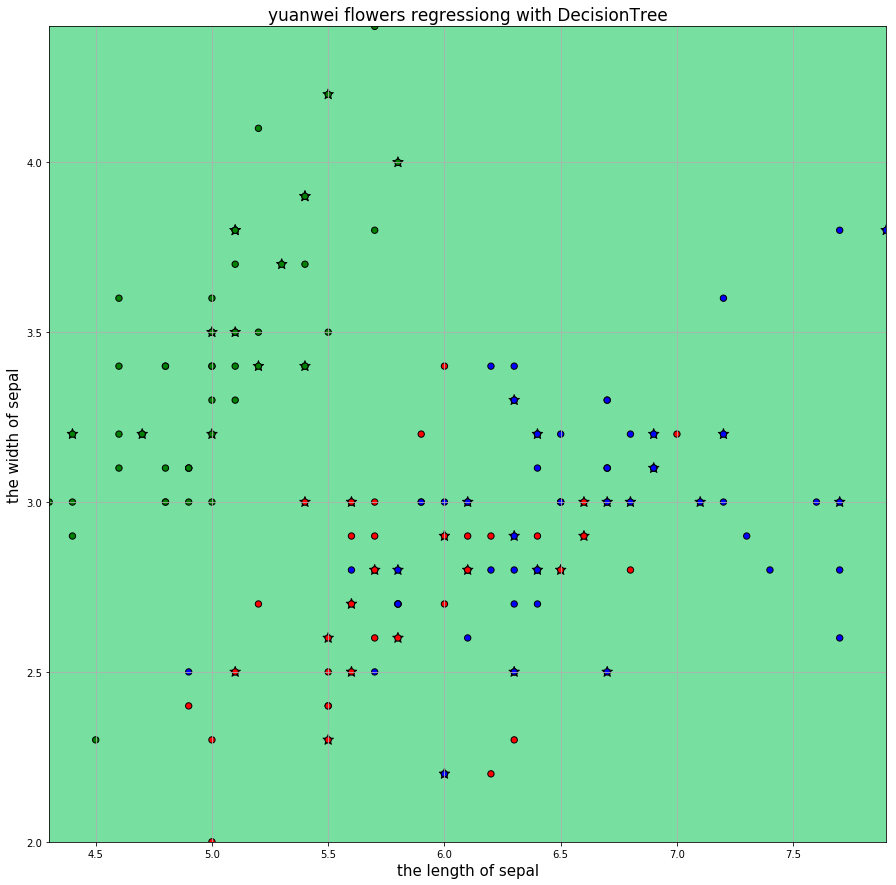

[0. 1. 1. 0. 2. 1. 2. 0. 0. 2. 1. 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 1. 2. 0.
 2. 1. 0. 0. 1. 2. 1. 2. 1. 2. 2. 0. 1. 0. 1. 2. 2. 0. 1. 2. 1.]
[0. 1. 1. 0. 2. 1. 2. 0. 0. 2. 1. 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 2. 1. 0. 0. 1. 2. 1. 2. 1. 2. 2. 0. 1. 0. 1. 2. 2. 0. 2. 2. 1.]
accuracy: 95.56%
1 error ratio: 40.00%
2 error ratio: 4.44%
3 error ratio: 4.44%
4 error ratio: 4.44%
5 error ratio: 4.44%
6 error ratio: 4.44%
7 error ratio: 4.44%
8 error ratio: 4.44%
9 error ratio: 4.44%
10 error ratio: 4.44%
11 error ratio: 4.44%
12 error ratio: 4.44%
13 error ratio: 4.44%
14 error ratio: 4.44%


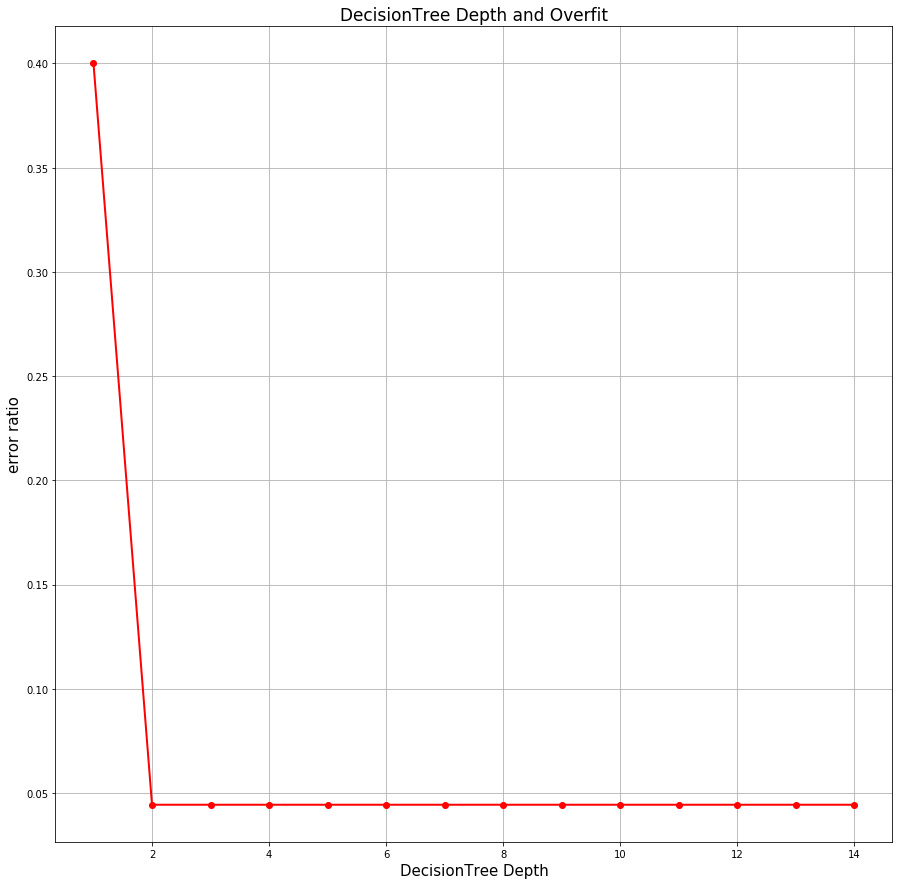

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pydotplus

#import os
#os.environ["PATH"] += os.pathsep + 'E:\AI\Sample\Classifier\DecisionTree\graphviz-2.38\release\bin' 
#注意修改你的路径

if __name__ == "__main__":
    iris_feature_E = "sepal lenght", "sepal width", "petal length", "petal width"
    iris_feature = "the length of sepal", "the width of sepal", "the length of petal", "the width of petal"
    iris_class = "Iris-setosa", "Iris-versicolor", "Iris-virginica"

    data = pd.read_csv("iris.data", header=None)
    iris_types = data[4].unique()
    print(iris_types)

    for i, type in enumerate(iris_types):
        data.set_value(data[4] == type, 4, i)
    x, y = np.split(data.values, (4,), axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)
    print(y_test)
 
    model = DecisionTreeClassifier(criterion='entropy', max_depth=6)
    model = model.fit(x_train, y_train)
    y_test_hat = model.predict(x_test)

    with open('iris.dot', 'w') as f:
        tree.export_graphviz(model, out_file=f)
    
    dot_data = tree.export_graphviz(model, out_file=None, feature_names=iris_feature_E, class_names=iris_class, filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_pdf('iris.pdf')
    f = open('iris.png', 'wb')
    f.write(graph.create_png())
    f.close()
 
    # 画图
    # 横纵各采样多少个值
    N, M = 50, 50
    # 第0列的范围
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
    # 第1列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    
    # 生成网格采样点
    x1, x2 = np.meshgrid(t1, t2)
    # # 无意义，只是为了凑另外两个维度
    # # 打开该注释前，确保注释掉x = x[:, :2]
    x3 = np.ones(x1.size) * np.average(x[:, 2])
    x4 = np.ones(x1.size) * np.average(x[:, 3])
    # 测试点
    x_show = np.stack((x1.flat, x2.flat, x3, x4), axis=1)
    #print("x_show_shape:\n", x_show.shape)

    cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    
    # 预测值
    y_show_hat = model.predict(x_show)
    print(y_show_hat.shape)
    print(y_show_hat)
    
    # 使之与输入的形状相同
    y_show_hat = y_show_hat.reshape(x1.shape)
    print(y_show_hat)
    plt.figure(figsize=(15, 15), facecolor='w')
    
    # 预测值的显示
    plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)
    print(y_test)
    print(y_test.ravel())
    
    # 测试数据
    plt.scatter(x_test[:, 0], x_test[:, 1], c=np.squeeze(y_test), edgecolors='k', s=120, cmap=cm_dark, marker='*')
    # 全部数据
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), edgecolors='k', s=40, cmap=cm_dark)
    plt.xlabel(iris_feature[0], fontsize=15)
    plt.ylabel(iris_feature[1], fontsize=15)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid(True)
    plt.title('yuanwei flowers regressiong with DecisionTree', fontsize=17)
    plt.show()
 
    # 训练集上的预测结果
    y_test = y_test.reshape(-1)
    print(y_test_hat)
    print(y_test)
    # True则预测正确，False则预测错误
    result = (y_test_hat == y_test)
    acc = np.mean(result)
    print('accuracy: %.2f%%' % (100 * acc))
 
    # 过拟合：错误率
    depth = np.arange(1, 15)
    err_list = []
    for d in depth:
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
        clf = clf.fit(x_train, y_train)
        
        # 测试数据
        y_test_hat = clf.predict(x_test)
        
        # True则预测正确，False则预测错误
        result = (y_test_hat == y_test)
        err = 1 - np.mean(result)
        err_list.append(err)
        print(d, 'error ratio: %.2f%%' % (100 * err))
    plt.figure(figsize=(15, 15), facecolor='w')
    plt.plot(depth, err_list, 'ro-', lw=2)
    plt.xlabel('DecisionTree Depth', fontsize=15)
    plt.ylabel('error ratio', fontsize=15)
    plt.title('DecisionTree Depth and Overfit', fontsize=17)
    plt.grid(True)
    plt.show()